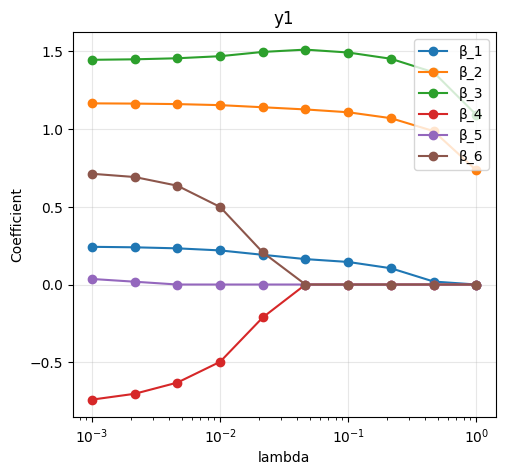

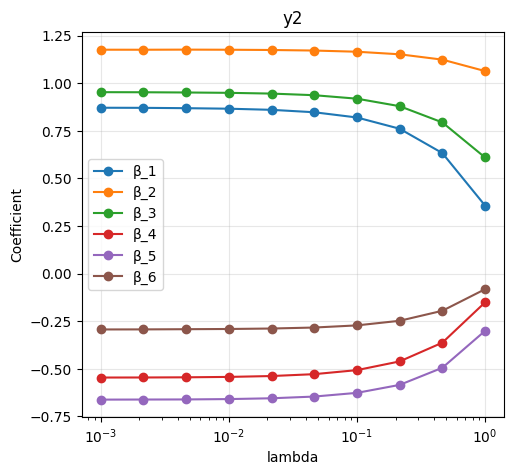

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#step 2   
def soft_th(x, lambda_v):
    return np.sign(x) * np.maximum(np.abs(x) - lambda_v, 0)

def centralize(X, y, standardize=True):
    X = np.asarray(X)
    y = np.asarray(y)
    X_bar = np.mean(X, axis=0)
    X_centered = X - X_bar
    X_sd = np.std(X_centered, axis=0)
    
    if standardize:
        X_centered /= X_sd
    y_bar = np.mean(y)
    y_centered = y - y_bar
    return X_centered, y_centered, X_bar, X_sd, y_bar


def linear_lasso(X, y, lambda_v=0, eps=0.001, max_iter=1000):

    n, p = X.shape
    
    X_centered, y_centered, X_bar, X_sd, y_bar = centralize(X, y)
    
    beta = np.zeros(p)
    
    for iteration in range(max_iter):
        beta_old = np.copy(beta)
        
        for j in range(p):
            # calculate residual
            residual = y_centered - X_centered @ beta + X_centered[:, j] * beta[j]
            
            # calculate sum_j
            sum_j = np.dot(X_centered[:, j], residual) / n
            
            # soft threshold
            beta[j] = soft_th(sum_j, lambda_v)
        
        #converged    
        if np.max(np.abs(beta - beta_old)) < eps:
            break
            
    # Transform back to original scale
    beta = beta / X_sd
    beta_0 = y_bar - np.sum(X_bar * beta)
    
    return beta, beta_0



#step 1
np.random.seed(42)
n_samples = 500
d_variables = 6

z1 = np.random.normal(0, 1, n_samples)
z2 = np.random.normal(0, 1, n_samples)

X = np.zeros((n_samples, d_variables))

#j = 1, 2, 3 x_j = z1 + e_j/5, epsilon different every time
for j in range(3):
    epsilon_j = np.random.normal(0, 1, n_samples)  
    X[:, j] = z1 + epsilon_j / 5

#j = 4, 5, 6 x_j = z2 + e_j/5 
for j in range(3, 6):
    epsilon_j = np.random.normal(0, 1, n_samples) 
    X[:, j] = z2 + epsilon_j / 5

#y1
epsilon_y1 = np.random.normal(0, 1, n_samples)
y1 = 3 * z1 + 2 * epsilon_y1

#y2  
epsilon_y2 = np.random.normal(0, 1, n_samples)
y2 = 3 * z1 - 1.5 * z2 + 2 * epsilon_y2

# different analysis
lambdas = np.logspace(-3, 0, 10)
cases = [(y1, "y1"), (y2, "y2")]

for y, case in cases:
    
    coefficients = []
    for lam in lambdas:
        beta, beta_0 = linear_lasso(X, y, lambda_v=lam)
        coefficients.append(beta)
    
    coefficients = np.array(coefficients)
    
    # Plot results
    plt.figure(figsize=(12, 5))
    
    # Coefficient paths
    plt.subplot(1, 2, 1)
    for j in range(d_variables):
        plt.plot(lambdas, coefficients[:, j], 'o-', label=f'β_{j+1}')
    plt.xscale('log')
    plt.xlabel('lambda')
    plt.ylabel('Coefficient')
    plt.title(f'{case}')
    plt.legend()
    plt.grid(True, alpha=0.3)